In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Predict a customer a  probable defaulter or not

## Data description

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

LoanStatNew	Description

- 0	loan_amnt	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- 1	term	The number of payments on the loan. Values are in months and can be either 36 or 60.
- 2	int_rate	Interest Rate on the loan
- 3	installment	The monthly payment owed by the borrower if the loan originates.
- 4	grade	LC assigned loan grade
- 5	sub_grade	LC assigned loan subgrade
- 6	emp_title	The job title supplied by the Borrower when applying for the loan.*
- 7	emp_length	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- 8	home_ownership	The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
- 9	annual_inc	The self-reported annual income provided by the borrower during registration.
- 10	verification_status	Indicates if income was verified by LC, not verified, or if the income source was verified
- 11	issue_d	The month which the loan was funded
- 12	loan_status	Current status of the loan
- 13	purpose	A category provided by the borrower for the loan request.
- 14	title	The loan title provided by the borrower
- 15	zip_code	The first 3 numbers of the zip code provided by the borrower in the loan application.
- 16	addr_state	The state provided by the borrower in the loan application
- 17	dti	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- 18	earliest_cr_line	The month the borrower's earliest reported credit line was opened
- 19	open_acc	The number of open credit lines in the borrower's credit file.
- 20	pub_rec	Number of derogatory public records
- 21	revol_bal	Total credit revolving balance
- 22	revol_util	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- 23	total_acc	The total number of credit lines currently in the borrower's credit file
- 24	initial_list_status	The initial listing status of the loan. Possible values are – W, F
- 25	application_type	Indicates whether the loan is an individual application or a joint application with two co-borrowers
- 26	mort_acc	Number of mortgage accounts.
- 27	pub_rec_bankruptcies	Number of public record bankruptcies

## Section 1: Exploratory data analysis
**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**

In [2]:
df = pd.read_csv('DATA/04_data_lending_club_loan.csv')
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [3]:
df.shape

(396030, 27)

In [4]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

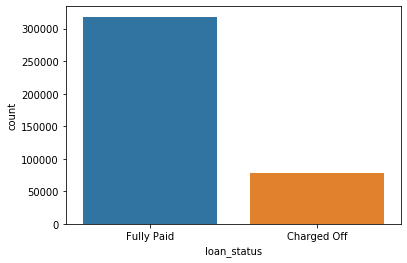

In [7]:
#Check how the labeled data is balanced
sns.countplot(df['loan_status'])

(12.0, 0.0)

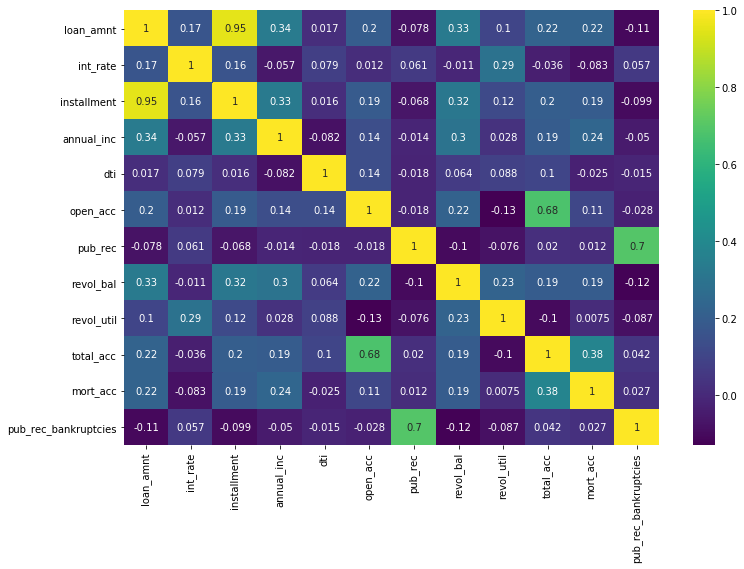

In [8]:
#See the correlation in the data
plt.figure(figsize = (12,8))
ax = sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

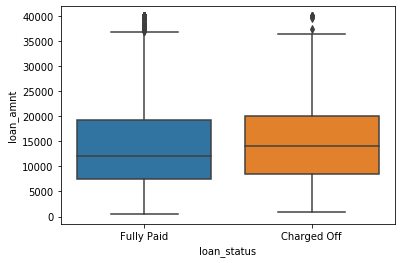

In [9]:
#Check the relation b/w loan amount and loan status
sns.boxplot('loan_status', 'loan_amnt', data = df)

In [10]:
# Loan status statistics
df.groupby(['loan_status'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [11]:
#Look in the data and see if there are any duplicate columns
df.head(4).transpose()

,0,1,2,3
loan_amnt,10000,8000,15600,7200
term,36 months,36 months,36 months,36 months
int_rate,11.44,11.99,10.49,6.49
installment,329.48,265.68,506.97,220.65
grade,B,B,B,A
sub_grade,B4,B5,B3,A2
emp_title,Marketing,Credit analyst,Statistician,Client Advocate
emp_length,10+ years,4 years,< 1 year,6 years
home_ownership,RENT,MORTGAGE,RENT,RENT
annual_inc,117000,65000,43057,54000


In [12]:
#Check feature - grade, sub_garde
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [13]:
#Check feature - sub_garde
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

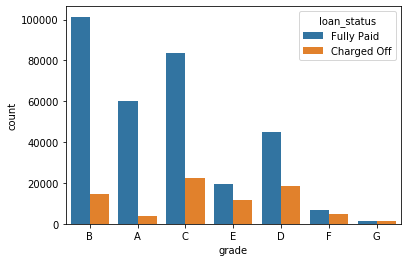

In [14]:
#See the relation bw grade and loan status
sns.countplot('grade', data = df, hue = 'loan_status')

In [15]:
#Replace loan status categories to binary - paid 1, charged off 0
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [16]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid' : 1, 'Charged Off' : 0})
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


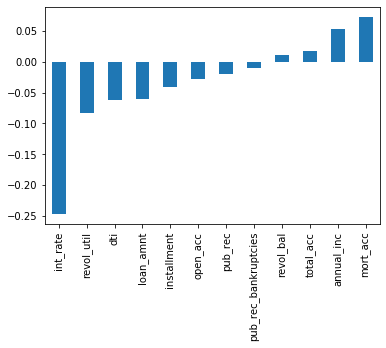

In [17]:
#Show correlatin of numeric features with newly created column - 'loan_repaid'
df.corr()['loan_repaid'][:-1].sort_values().plot(kind = 'bar')

## Section 2: Data preprocessing
**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**

# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [18]:
#Count of missing elements in each feature
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [19]:
# percentage of missing data in total dataframe
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them**

#### Missing entries in feature - emp_title

In [20]:
#Employee title feature analysis
df['emp_title'].value_counts()

Teacher                      4389
Manager                      4250
Registered Nurse             1856
RN                           1846
Supervisor                   1830
                             ... 
Harvard University AA&D         1
fine jewelery sales             1
Arnold Continuous Gutters       1
Data Warehouse Analyst          1
CLSS                            1
Name: emp_title, Length: 173105, dtype: int64

In [21]:
#seems there are lot of unique employee codes (173105), it is hard to convert in to one-hot encoding
#This feature can be drooped
df.drop('emp_title', axis = 1, inplace = True)

In [22]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

#### Missing entries in feature - emp_length

In [23]:
#Percentage of missing elements in emp_length feature
df['emp_length'].isnull().sum()/len(df['emp_length'])*100
#Percentage of missing entries are less, can think of replacing the missing elements if this feature really makes sense

4.621114562028129

In [24]:
#Check how important is the feature - emp_length
#Check the prediction o/p (loan_repaid status) decently depends on this feature or not ?

In [25]:
#Check the categories in emp_length feature
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

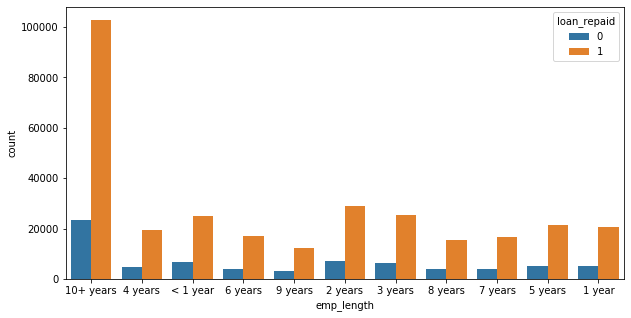

In [26]:
#visualise employment length vs loan repaid status
plt.figure(figsize = (10,5))
sns.countplot('emp_length', hue = 'loan_repaid', data = df)

In [27]:
#Check how these categories affect prediction output (loan_status)

#number of charged_off cases in each category
emp_not_paid =  df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
emp_not_paid

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [28]:
#number of fully paid cases in each category
emp_paid =  df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']
emp_paid

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

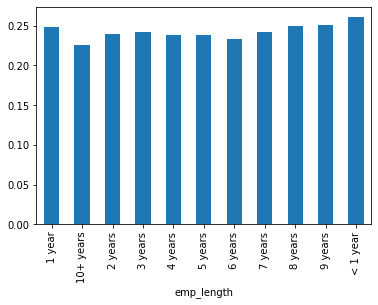

In [29]:
# Check percentage of employees not paid the loan based on their categories(2yr, 3yr etc)

(emp_not_paid/emp_paid).plot(kind= 'bar')

#### Feature emp_length can be dropped
** It is clear that the feature (emp_lenght) will not affect the predictions much, 
because all the categories are well balanced and not providing any clear indicction about predictions **

In [30]:
#Drop feature - emp_length
df.drop('emp_length', axis = 1, inplace = True)

#### Missing entries in feature - title

In [31]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [32]:
#features - title and pupose feature data is same - drop the ti
df.drop('title' , axis = 1, inplace = True)

#### Missing entries in feature - mort_acc : number of mortgage accounts

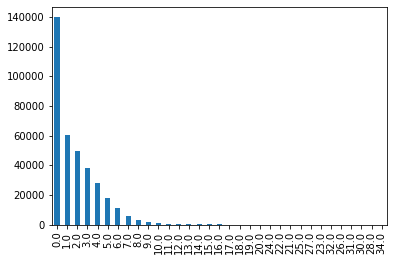

In [33]:
df['mort_acc'].value_counts().plot(kind = 'bar')

In [34]:
#Percentage of missing entries in this feature
df['mort_acc'].isnull().sum()/len(df['mort_acc'])*100

9.543468929121532

In [35]:
#Percentage of missinng elements are not so huze, no need to drop off the feature stright away

In [36]:
#Check are thre any similar features for number of mortgage accounts
#Correlation matrix will tell the similarity in features
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

#### Seems 'total number of accounts'feature (total_acc) is better correlatd to 'number of mortgage accounts' 
 
One way to fill the missing values in mort_acc feature is by using total_acc feature values.

For the user whose mortgage accounts number is missing, 
    1. take his total number of accounts
    2. take the mean of mortgage accounts for such users(whose total accounts are same as this person)
    3. fill the missing entry with the above value

In [37]:
#Mean value of mortgage accounts for users based on their toal accounts data
mean_mort_acc_count = df.groupby('total_acc').mean()['mort_acc']
mean_mort_acc_count

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [38]:
# Creare a function which takes mort_acc entry and total_acc entry and fills the mortgage entry if it is missing

'''
Accepts the total_acc and mort_acc values for the row.
Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
for the corresponding total_acc value for that row.

total_acc_avg here should be a Series or dictionary containing the mapping of the
groupby averages of mort_acc per total_acc values.
'''
def fill_mort_acc_missing_entry(mort_acc, total_acc):
    if np.isnan(mort_acc):
        return mean_mort_acc_count[total_acc]
    else:
        return mort_acc
    
fill_mort_acc_missing_entry(np.nan, 3)

0.05202312138728324

In [39]:
mean_mort_acc_count[3]

0.05202312138728324

In [40]:
#Fill missing entries of mort_acc using otal_acc information 
#axis = 1 => one row at a time
df['mort_acc'] = df.apply(lambda x : fill_mort_acc_missing_entry(x['mort_acc'], x['total_acc']), axis = 1)

In [41]:
df['mort_acc'].isnull().sum()

0

#### Missing entries in feature - revol_util

In [42]:
#See how many entries missing in revol_util feature
df['revol_util'].isnull().sum()/len(df['revol_util'].isnull())*100

0.06969169002348306

In [43]:
# The missing entries are very small and negligible(~ 0.07%)
# It is better to drop the missing entry rows => this affects overall sample set size

df.drop(df[df['revol_util'].isnull()].index, axis = 0, inplace = True)

In [44]:
df['revol_util'].isnull().sum()

0

#### Missing entries in feature - pub_rec_bankruptcies    

In [45]:
#See how many entries missing in pub_rec_bankruptcies feature
df['pub_rec_bankruptcies'].isnull().sum()/len(df['pub_rec_bankruptcies'].isnull())*100

0.13518498865456824

In [46]:
# The missing entries are very small and negligible(~ 0.14%)
# It is better to drop the missing entry rows => this affects overall sample set size

df.drop(df[df['pub_rec_bankruptcies'].isnull()].index, axis = 0, inplace = True)

In [47]:
df['pub_rec_bankruptcies'].isnull().sum()

0

In [48]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

#### Done with missing entry handling

# Categorical feature handling

In [49]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

#### Display all categorical feature labels

In [50]:
#Display datatypes of features
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
loan_repaid               int64
dtype: object

In [51]:
#Display labels of categorical features (text in the data)
df.select_dtypes(include = ['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

####  String feature handling - term 


In [52]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [53]:
#replacing categorical feature string values with extracted numerical values
df['term'] = df['term'].map({' 36 months': 36, ' 60 months': 60}) # Note:  In this case text started with single space

In [54]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

####  String feature handling - grade

In [55]:
# We already know that 'grade' is part of 'sub_grade', so drop the grade feature
df.drop('grade', axis = 1, inplace = True)

####  String feature handling - sub_grade

In [56]:
#one-hot encoding for categorical features
#drop first(any one) dummy category since this can be dervied from other dummy features
new_df = pd.get_dummies(df['sub_grade'], drop_first = True)
new_df

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#concatenate newly created dummy features
df = pd.concat([df, new_df], axis = 1)
df.drop('sub_grade', axis = 1, inplace = True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

####  String feature handling - home_ownership 

In [58]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [59]:
#Here some categories can be merged : NONE and ANY to OTHER since data set is very small for NONE, ANY category
df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace = True)
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [60]:
#convert categorical features in to dummy features
#drop first(any one) dummy category since this can be dervied from other dummy features
dummy_df = pd.get_dummies(df['home_ownership'], drop_first = True)
df = pd.concat([df.drop('home_ownership', axis = 1), dummy_df], axis = 1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

####  String feature handling - verification_status 

In [61]:
df['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

####  String feature handling - purpose 

In [62]:
df['purpose'].value_counts()

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

####  String feature handling - initial_list_status 

In [63]:
df['initial_list_status'].value_counts()

f    237346
w    157873
Name: initial_list_status, dtype: int64

####  String feature handling - application_type 

In [64]:
df['application_type'].value_counts()

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

#### These features are categorical data that can be directly converted in to one-hot encoding
    verification_status, purpose, initial_list_status, application_type

In [65]:
#one-hot encoding
#convert categorical features in to dummy features
#drop first(any one) dummy category since this can be dervied from other dummy features
dummy_df = pd.get_dummies(df[['verification_status', 'purpose', 'initial_list_status', 'application_type']], drop_first = True)
df.drop(['verification_status', 'purpose', 'initial_list_status', 'application_type'], axis = 1, inplace = True)
df = pd.concat([df, dummy_df], axis = 1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'OTHER', 'OWN', 'RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_

####  String feature handling - issue_d 

In [66]:
df['issue_d'].value_counts()

Oct-2014    14838
Jul-2014    12597
Jan-2015    11701
Dec-2013    10609
Nov-2013    10492
            ...  
Jan-2008        3
Dec-2007        2
Aug-2007        1
Nov-2007        1
Oct-2007        1
Name: issue_d, Length: 112, dtype: int64

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [67]:
df.drop('issue_d', axis = 1, inplace = True)

####  String feature handling - earliest_cr_line 

In [68]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Feb-1962       1
Aug-1962       1
Dec-1959       1
Nov-1955       1
May-1955       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [69]:
#processing date time features 
# takign only year feature from the date time string. Month can also be taken as new feature
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_year'] =  df['earliest_cr_line'].apply(lambda date : date.year)

#deleting data time original fetatures as newly derived features have all the information
df.drop('earliest_cr_line', axis = 1, inplace = True)

####  String feature handling - address 

In [70]:
df['address'].value_counts()

USNS Johnson\r\nFPO AE 05113                              8
USS Johnson\r\nFPO AE 48052                               8
USS Smith\r\nFPO AP 70466                                 8
USCGC Smith\r\nFPO AE 70466                               8
USNS Johnson\r\nFPO AP 48052                              7
                                                         ..
48175 Mcdaniel Rue\r\nPort Kylieside, MA 00813            1
USNV Perez\r\nFPO AE 00813                                1
30845 Julie Port Apt. 356\r\nAshleyfort, VT 22690         1
8561 Johnson Creek\r\nKathyberg, ND 00813                 1
87259 Michael Avenue Suite 660\r\nGeorgeland, SC 22690    1
Name: address, Length: 392898, dtype: int64

In [71]:
#from address string, xip code can be extracted and can be used as categorical feature
df['zipcode'] = df['address'].apply(lambda add : add[-5:])

In [72]:
#converting zipcode string in to one-hot encoding dumy features
dummy_df = pd.get_dummies(df['zipcode'], drop_first = True)
df = pd.concat([df.drop(['zipcode', 'address'], axis = 1), dummy_df], axis = 1)

####  String feature handling - loan_status 

In [73]:
#It is a duplicate feature as loan_repaid feture contains the same information in number values(0/1)

In [74]:
df.drop('loan_status', axis = 1, inplace = True)

In [75]:
#check whether all the categorical features are processed or not
len(df.select_dtypes(include = ['object']).columns)

0

#### Done with categorical feature analysis

#### Final check for the data

In [76]:
#Data size
df.shape

(395219, 79)

In [77]:
#Check if there are any categorical features left
df.select_dtypes(include = ['object']).columns

Index([], dtype='object')

## Train test data split

In [78]:
from sklearn.model_selection import train_test_split 

In [81]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,earliest_cr_year,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,1990,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,2004,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,2007,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,2006,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,1999,0,1,0,0,0,0,0,0,0


In [82]:
X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values

In [96]:
X.shape

(395219, 78)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101 )

In [97]:
#Scale features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train model

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Layers : 78(i/p) -> 39 -> 19 -> 1(0/p)

model = Sequential()
#input layer - with units size as no.of features
model.add(Dense(78, activation = 'relu'))
model.add(Dropout(rate = 0.2))

#hidden layer 1 
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(rate = 0.2))

#hidden layer 2
model.add(Dense(19, activation = 'relu'))
model.add(Dropout(rate = 0.2))

#output layer
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy')


#### Training logistic regression/ classification model : with early stop

In [101]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

model.fit(X_train, y_train, validation_data = [X_test, y_test], batch_size = 256, epochs = 100)

Train on 316175 samples, validate on 79044 samples
Epoch 1/100
316175/316175 [==============================] - 10s 33us/sample - loss: 0.3000 - val_loss: 0.2646
Epoch 2/100
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2655 - val_loss: 0.2628
Epoch 3/100
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2629 - val_loss: 0.2622
Epoch 4/100
316175/316175 [==============================] - 7s 21us/sample - loss: 0.2618 - val_loss: 0.2627
Epoch 5/100
316175/316175 [==============================] - 6s 20us/sample - loss: 0.2609 - val_loss: 0.2619
Epoch 6/100
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2598 - val_loss: 0.2619
Epoch 7/100
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2600 - val_loss: 0.2614
Epoch 8/100
316175/316175 [==============================] - 7s 23us/sample - loss: 0.2595 - val_loss: 0.2624
Epoch 9/100
316175/316175 [==============================] - 7s 22us

316175/316175 [==============================] - 6s 19us/sample - loss: 0.2517 - val_loss: 0.2613
Epoch 75/100
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2518 - val_loss: 0.2616
Epoch 76/100
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2515 - val_loss: 0.2617
Epoch 77/100
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2514 - val_loss: 0.2617
Epoch 78/100
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2515 - val_loss: 0.2620
Epoch 79/100
316175/316175 [==============================] - 6s 19us/sample - loss: 0.2514 - val_loss: 0.2615
Epoch 80/100
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2513 - val_loss: 0.2622
Epoch 81/100
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2513 - val_loss: 0.2625
Epoch 82/100
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2512 - val_loss: 0.2621
Epoch 83/100
3

In [102]:
df_loss = pd.DataFrame(model.history.history)
df_loss

,loss,val_loss
0,0.300006,0.264552
1,0.265482,0.262846
2,0.262903,0.262179
3,0.261757,0.262729
4,0.260902,0.261854
...,...,...
95,0.250745,0.260997
96,0.250592,0.261842
97,0.250714,0.262126
98,0.250447,0.261822


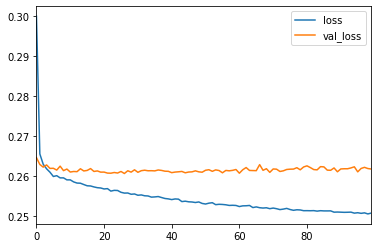

In [103]:
df_loss.plot()

In [105]:
#It is clear as we keep on training the training loss is getting reduced but the validation loss is almost same\
#we can conclude the training for now and see the performance of the model to decide further action

#### Model evaluation

In [106]:
y_pred = model.predict_classes(X_test)

In [108]:
from sklearn.metrics import classification_report

rep = classification_report(y_test, y_pred)

In [110]:
print(rep)

              precision    recall  f1-score   support

           0       0.92      0.48      0.63     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.90      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



In [112]:
from sklearn.metrics import confusion_matrix

rep = confusion_matrix(y_test, y_pred)
print(rep)

[[ 7449  8209]
 [  676 62710]]


## Still there is a scope for further improvement

#### You can save the model if you want

In [116]:
from tensorflow.keras.models import load_model
model.save('model_lending_club.h5')
my_model = load_model('model_lending_club.h5')

**TASK: Given the customer below, would you offer this person a loan?**

In [117]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [132]:
#reshape the new input data in the required format
x_test = new_customer.values
x_test.shape

(78,)

In [133]:
x_test = x_test.reshape(1, 78)
x_test.shape                

(1, 78)

In [142]:
#predict output
y_pred = my_model.predict_classes(x_test)
y_pred

array([[1]])

In [139]:
#ground truth
df.iloc[random_ind]['loan_repaid']

1.0

#### In the given test case, the model predicted correctly the the user wil repay the loan amount completely.

# END